In [1]:
import pandas as pd  # Data handling
import numpy as np   # Numerical operations
import seaborn as sns

In [2]:
df = pd.read_csv("amazon.csv")

Dropping the unnecessary columns.

In [3]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage  rating rating_count  \
0       ₹1,099                 64%     4.2       24,269   
1         ₹349                 43%

Dropping the unnecessary columns.

In [4]:
columns_to_drop = [
    "img_link", "product_link", "user_name", "review_id", 
    "review_title", "review_content"
]

# Drop the columns
df = df.drop(columns=columns_to_drop, axis=1)

# Display the updated DataFrame
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage  rating rating_count  \
0       ₹1,099                 64%     4.2       24,269   
1         ₹349                 43%

In [5]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
dtype: int64


In [6]:
df.dropna(inplace=True)

In [7]:
print(df.isnull().sum())

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
dtype: int64


Remove percentage symbol (%) from discount column.

In [8]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')

In [9]:
print(df.discount_percentage)

0       64
1       43
2       90
3       53
4       61
        ..
1460    59
1461    25
1462    28
1463    26
1464    22
Name: discount_percentage, Length: 1463, dtype: object


Remove commas from rating columns.

In [10]:
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=True)

In [11]:
print(df.rating_count)

0       24269
1       43994
2        7928
3       94363
4       16905
        ...  
1460     1090
1461     4118
1462      468
1463     8031
1464     6987
Name: rating_count, Length: 1463, dtype: object


Lets remove any special characters from all the numerical columns.

In [12]:
df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'rating']] = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating_count', 'rating']].replace(r'[^0-9.]', '', regex=True)


Checking the Data type of all the numerical columns.

In [13]:
print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price        object
actual_price            object
discount_percentage     object
rating                 float64
rating_count            object
about_product           object
user_id                 object
dtype: object


We can see all the the columns have "object" as their data type.

we have to convert the data type of all the numerical columns to float.

In [14]:
df['discounted_price'] = df['discounted_price'].astype(float)
df['actual_price'] = df['actual_price'].astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(float)
df[ 'rating_count'] = df[ 'rating_count'].astype(float)
df['rating'] = df['rating'].astype(float)


In [15]:
print(df.dtypes)

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
dtype: object


In [16]:
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]

In [17]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0       

In [18]:
df.to_csv("cleaned_amazon.csv", index=False)
df = pd.read_csv("cleaned_amazon.csv")

# Exploratory Data Analysis (EDA)

## Product analysis

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [20]:
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt


In [21]:
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1458  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1459  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1460  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1461  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1462  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             39

We'll count the top 15 main category products.

In [22]:
main_category_counts = df['main_category'].value_counts()[:15] 

In [23]:
top_main_categories = pd.DataFrame({'Main Category': main_category_counts.index, 'Number of Products': main_category_counts.values})
print('Top 15 main categories:')
print(top_main_categories.to_string(index=False))

Top 15 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 448
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


Using the above data we can draw the following conclusions:

Electronics, Computers & Accessories, and Home & Kitchen are the top three categories. This indicates how popular these categories are by consumers.

The fact that there are so few products in the other major categories suggests that they are not as popular as the top three.

Very few products in the categories of Office Products, Musical Instruments, Home Improvement, Toys & Games, Car & Motorbike, and Health & Personal Care may indicate that there is less demand for these products.


In [24]:
sub_category_counts = df['sub_category'].value_counts()[:15] 


# Top 15 sub categories 
top_sub_categories = pd.DataFrame({'Sub Category': sub_category_counts.index, 'Number of Products': sub_category_counts.values})
print('Top 15 sub categories:')
print(top_sub_categories.to_string(index=False))


Top 15 sub categories:
       Sub Category  Number of Products
          USBCables                 231
       SmartWatches                  76
        Smartphones                  68
   SmartTelevisions                  63
             In-Ear                  52
     RemoteControls                  49
      MixerGrinders                  27
         HDMICables                  24
           DryIrons                  24
               Mice                  24
InstantWaterHeaters                  23
        LintShavers                  22
         FanHeaters                  20
    ElectricHeaters                  20
    ElectricKettles                  19


Smartwatches, smartphones, smart TVs, in-ear headphones, remote controllers, and USB cables are the top six subcategories. These are the most popular subcategories, so companies could concentrate on offering goods in these areas to get more clients.

 Additional well-liked subcategories include mouse, dry irons, HDMI cables, mixer grinders, and fast water heaters. Despite being less well-known than the top six, these subcategories nevertheless offer a sizable product selection, suggesting that there is a market for them.

The information reveals that the top 15 include a wide variety of subcategories, such as personal accessories, home electronics, and culinary appliances. This tell us how crucial it is to provide a range of items in order to satisfy the various demands and tastes of customers.

Now, We will analyse the customer ratings.

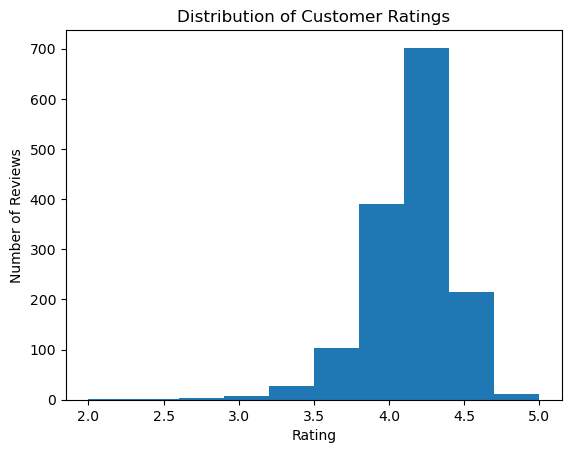

In [25]:
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Customer Ratings')
plt.show()

Now, to dive deep into the customer ratings, we will use a table.

The below code categorizes numerical values from the rating column into discrete bins (ranges) using pd.cut().

In [26]:
bins = [0, 1, 2, 3, 4, 5]  # Define bin edges
df['cluster'] = pd.cut(df['rating'], bins=bins, include_lowest=True, labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

# Count occurrences and reset index
table = df['cluster'].value_counts().reset_index().sort_values(by='cluster')

# Rename columns explicitly
table.columns = ['Cluster', 'Number of Reviews']

# Display the table
print(table)


  Cluster  Number of Reviews
4     0-1                  0
3     1-2                  1
2     2-3                  8
1     3-4                526
0     4-5                928


With a total of 1463 reviews, the Majority of customer evaluations are in the 3–4 and 4-5 range.

The number of reviews in the 2-3 range is noticeably higher than those in the lower 0-1 and 1-2 areas.

The 0–1 range contains only 1 review, suggesting that customer satisfaction might be in need of some improving.

Although the distribution of customer ratings indicates that most consumers are happy with the products overall, there might be room for improvement to boost the proportion of positive reviews.

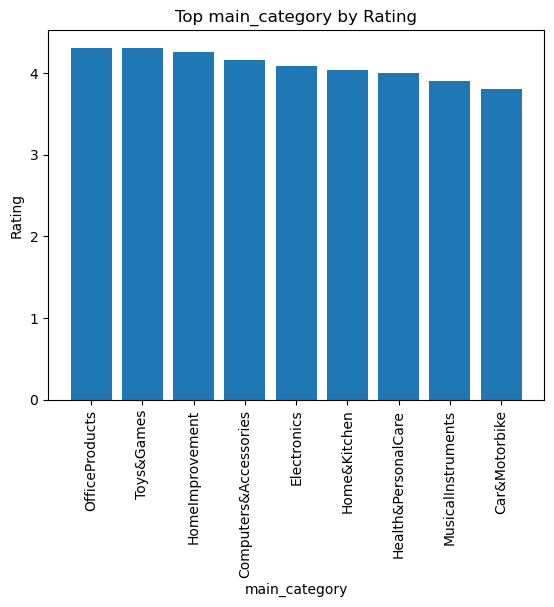

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040402
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [27]:
# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['main_category'], top['rating'])

# Add labels and title
plt.xlabel('main_category')
plt.ylabel('Rating')
plt.title('Top main_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

The main categories are shown in this table according to their average rating. 

With ratings above 4.0, Office Products, Toys & Games, and Home Improvement are the primary categories with the highest ratings. This implies that consumers are largely happy with the goods available in these category.

However, with ratings below 4.0, the main categories with worse ratings are Health & Personal Care, Musical Instruments, and Car & Motorbike.  This could point out areas that need work in order to better satisfy client expectations.

Furthermore, we can observe that Electronics and Computers & Accessories have ratings higher than 4.0, indicating that consumers find these categories appealing and well-liked. 



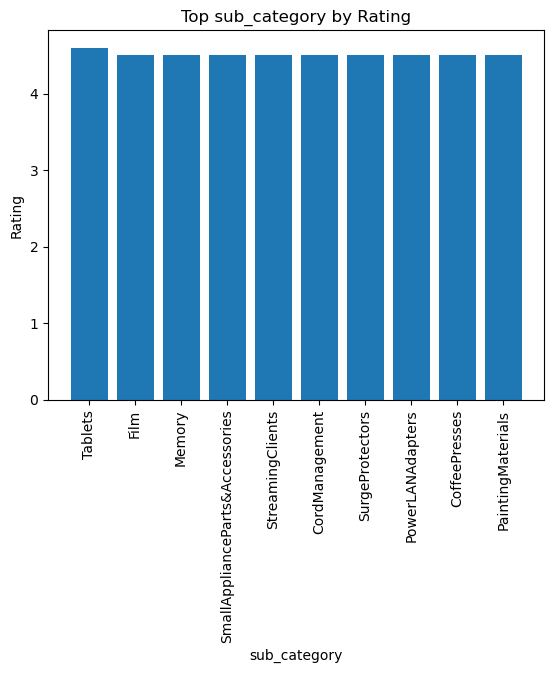

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


In [28]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar plot
plt.bar(top['sub_category'], top['rating'])

# Add labels and title
plt.xlabel('sub_category')
plt.ylabel('Rating')
plt.title('Top sub_category by Rating')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending=False).reset_index()
print(ranking)

The table displays the top and lowest subcategories based on ratings from customers.

The fact that the "Tablets" subcategory has the highest rating (4.6), indicating that buyers are happy with their purchase.

Subcategories like "DustCovers" and "ElectricGrinders" near the bottom, however, have lower ratings, suggesting that consumers are not particularly pleased with these products.



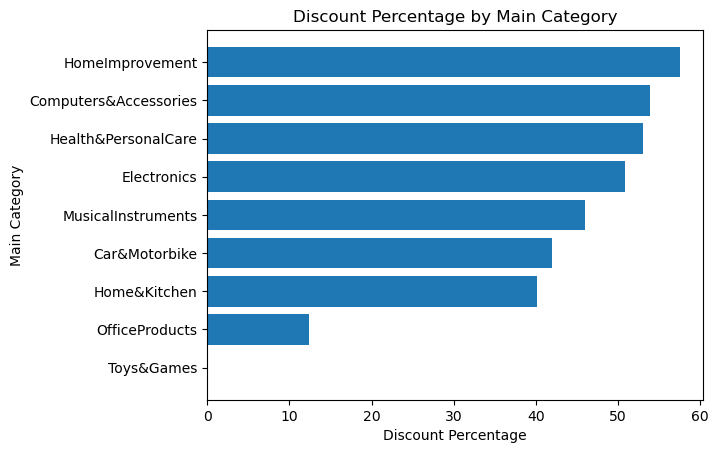

           Main Category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                 12.354839
2           Home&Kitchen                 40.120536
3          Car&Motorbike                 42.000000
4     MusicalInstruments                 46.000000
5            Electronics                 50.828897
6    Health&PersonalCare                 53.000000
7  Computers&Accessories                 53.920177
8        HomeImprovement                 57.500000


In [29]:
# sort the means in descending order
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.title('Discount Percentage by Main Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.show()

table = pd.DataFrame({'Main Category': mean_discount_by_category.index, 'Mean Discount Percentage': mean_discount_by_category.values})

print(table)

With a value of 0.0, Toys & Games has the lowest mean discount %.  This would suggest that there is such a great demand for games and toys that companies do not need to provide steep discounts in order to sell them.

The mean discount percentages for Home & Kitchen and Car & Motorbike are 40.1745 and 42, respectively.  This implies that these two categories might have comparable levels of price sensitivity and competition.

With mean discount percentages of 57.5, 53.9202, and 50.8289, respectively, Home Improvement, Computers & Accessories, and Electronics have the greatest percentages.  This would suggest that these markets are more price-sensitive and that in order for businesses to successfully compete, they must provide alluring discounts.

Additionally, it's noteworthy that the mean discount percentages for OfficeProducts and Health&PersonalCare fall between the lowest and greatest categories, at 12.3548 and 53, respectively. 



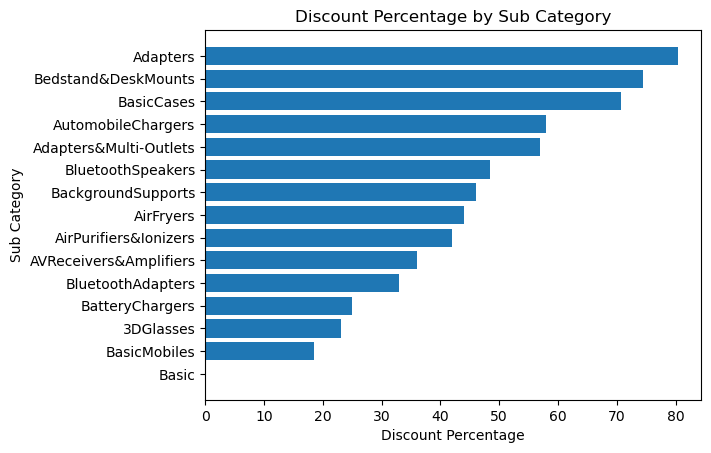

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                 18.555556
2                3DGlasses                 23.000000
3          BatteryChargers                 25.000000
4        BluetoothAdapters                 33.000000
5   AVReceivers&Amplifiers                 36.000000
6    AirPurifiers&Ionizers                 42.000000
7                AirFryers                 44.000000
8       BackgroundSupports                 46.000000
9        BluetoothSpeakers                 48.500000
10  Adapters&Multi-Outlets                 57.000000
11      AutomobileChargers                 58.000000
12              BasicCases                 70.750000
13     Bedstand&DeskMounts                 74.500000
14                Adapters                 80.333333


In [30]:
# sort the means in descending order
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending=True)

# create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.title('Discount Percentage by Sub Category')
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category': mean_discount_by_sub_category.index, 'Mean Discount Percentage': mean_discount_by_sub_category.values})

print(table)

With a mean discount percentage of 0.0, Basic is the subcategory with the lowest proportion. This would suggest that fundamental goods, which are usually inexpensive and straightforward, don't require steep discounts to draw in customers.

Examples of subcategories with moderate mean discount percentages, ranging from 18.55 to 25, are BatteryChargers, 3DGlasses, and BasicMobiles.  This implies that these products might be price-sensitive to some degree, but not as much as those in the subcategories with greater mean discount percentages.

The typical discount percentages for the subcategories of Bluetooth speakers, bedstands and desk mounts, and basic cases are substantial, ranging from 48.5 to 74.5. Given that certain products might be more price-sensitive than others, businesses may need to provide alluring discounts in order to successfully compete in these subcategories.

Adapters has the greatest mean discount percentage (80.3333) of any subcategory.  This suggests that shops need to provide substantial discounts in order to draw customers because there is fierce rivalry for these products.





In [31]:
print(df.head())

   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category  discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             399.0   
1  Computers&Accessories|Accessories&Peripherals|...             199.0   
2  Computers&Accessories|Accessories&Peripherals|...             199.0   
3  Computers&Accessories|Accessories&Peripherals|...             329.0   
4  Computers&Accessories|Accessories&Peripherals|...             154.0   

   actual_price  discount_percentage  rating  rating_count  \
0        1099.0                 64.0     4.2       24269.0   
1         349.0       

We will plot a correlation matrix to see the correlation between columns.

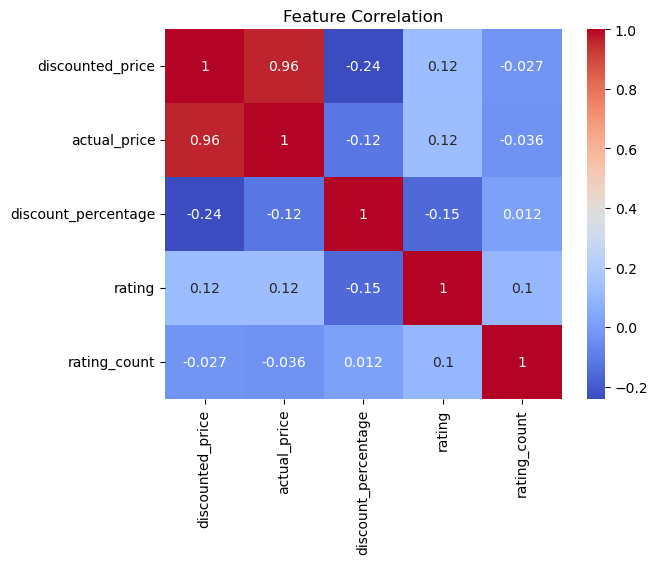

In [32]:
sns.heatmap(df[["discounted_price", "actual_price", "discount_percentage", "rating", "rating_count"]].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


# Recommendation system.

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id_encoded'] = le.fit_transform(df['user_id'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'User ID': df['user_id_encoded'].value_counts().index, 'Frequency': df['user_id_encoded'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

      User ID  Frequency
0        1046         10
1         622          8
2         673          8
3         253          7
4          87          7
...       ...        ...
1187       11          1
1188      898          1
1189      369          1
1190      351          1
1191      432          1

[1192 rows x 2 columns]
1046


A frequent stage in data analysis and machine learning is converting a column of strings to integers, which has multiple applications. 

Converting user IDs from strings to integers can make it easier to calculate similarity scores between users or objects in a recommendation system. This can increase the recommendation system's accuracy and efficiency. 

All things considered, turning strings into numbers is a typical and practical step in data analysis and machine learning, and it can be very beneficial for enhancing recommendation system performance. 

Converting the data can assist guarantee that the algorithm can process it appropriately, as many machine learning algorithms need numerical input data to function properly. 



In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(df, user_id_encoded):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['about_product'])

    # Get the purchase history for the user
    user_history = df[df['user_id_encoded'] == user_id_encoded]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [user_id_encoded] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None

In [35]:
recommend_products(df, 203)

,Id Encoded,recommended product,score recommendation
0,203,Prestige Clean Home Water Purifier Cartridge,1.000000
1,203,Sure From Aquaguard Delight NXT RO+UV+UF+Taste...,0.280499
2,203,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,0.247609
3,203,AVNISH Tap Water Purifier Filter Faucet 6 Laye...,0.229633
4,203,Aquadpure Copper + Mineral RO+UV+UF 10 to 12 L...,0.229606
